In [1]:
import re
import pandas as pd

def eval_from_log(path:str):
    pattern = re.compile("= -?\d.\d\d\d\d?")
    
    v=[]

    for i, line in enumerate(open(path, 'r')):
        for match in re.finditer(pattern, line):
            # print(match.group()[0])
            v.append(float(match.group()[2:]))

    return {'mAP': v[0], 'mAP.5': v[1], 'mAP.75': v[2], 'mAPs': v[3], 'mAPm': v[4], 'mAPl': v[5], 'LAMR': round(v[12], 3)}


def eval_df(paths, name=None):
    values = []
    for i, p in enumerate(paths):
        if isinstance(p, tuple):
            values.append(list(p[1].values()) + list(eval_from_log(p[0]).values()))
        else:
            values.append(list(eval_from_log(p).values()))

    if isinstance(p, tuple):
        df = pd.DataFrame(values, columns=list(p[1].keys()) + ['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(id_vars=list(p[1].keys()), var_name='metric')
    else:
        df = pd.DataFrame(values, columns=['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(var_name='metric')

    return df

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange
# sb.set_palette(sb.color_palette(['#179C7D','#52E5C3'])) # KIT green shades
sb.set_context('paper')
sb.set_style('darkgrid')

In [9]:
import string

PIROPO = []
PIROPO_FT = []
PIROPO_MW = []
PIROPO_FT_MW = []
PIROPO.append(('PIROPO/sweep/test2_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200,500,1000]:
    for l in range(10):
        PIROPO.append((f'PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT.append((f'PIROPO/sweep_ft/test2_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_MW.append((f'PIROPO_MW/sweep/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT_MW.append((f'PIROPO_MW/sweep_ft/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
PIROPO.append(('PIROPO/sweep/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT.append(('PIROPO/sweep_ft/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_MW.append(('PIROPO_MW/sweep/test_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT_MW.append(('PIROPO_MW/sweep_ft/test_all.txt', {'# training images': 2357, 'id': 'a'}))

MW_18MAR = []
MW_PIROPO = []
MW_BOMNI = []
MW_18MAR.append(('MW-18Mar/sweep/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200]:
    for l in range(10):
        MW_18MAR.append((f'MW-18Mar/sweep/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_PIROPO.append((f'MW_PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_BOMNI.append((f'MW_BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
MW_18MAR.append(('MW-18Mar/sweep/test_all.txt', {'# training images': 819, 'id': 'a'}))
MW_PIROPO.append(('MW_PIROPO/sweep/test2_all.txt', {'# training images': 819, 'id': 'a'}))
MW_BOMNI.append(('MW_BOMNI/test_all.txt', {'# training images': 819, 'id': 'a'}))

PIROPOMW = [
    ('PIROPO+MW/sweep/MW-18Mar_test.txt', {'# training images': 3176, 'id': 'a'}),
    ('PIROPO+MW/sweep/PIROPO_omni_test2.txt', {'# training images': 3176, 'id': 'a'})
]

BOMNI = []
BOMNI.append(('BOMNI/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100]:
    for l in range(10):
        BOMNI.append((f'BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
BOMNI.append(('BOMNI/test_all.txt', {'# training images': 236, 'id': 'a'}))


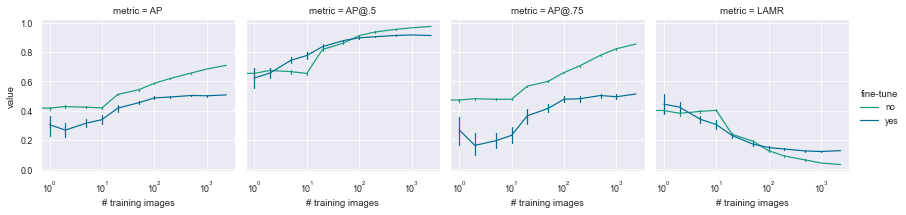

In [6]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='fine-tune', value='no')

piropo_ft = eval_df(PIROPO_FT)
piropo_ft.insert(loc=0, column='fine-tune', value='yes')

df = pd.concat([piropo, piropo_ft], ignore_index=True)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric', hue='fine-tune')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('priropo.png')

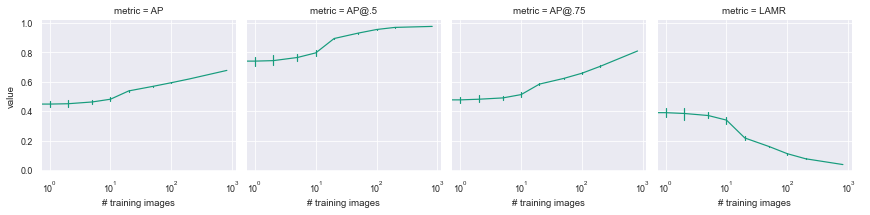

In [145]:
df = eval_df(MW_18MAR)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('mw-18mar.png')

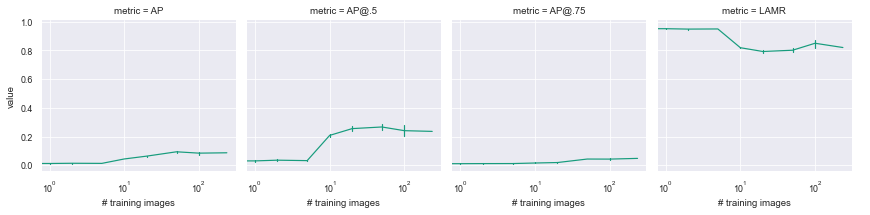

In [10]:
df = eval_df(BOMNI)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('bomni.png')

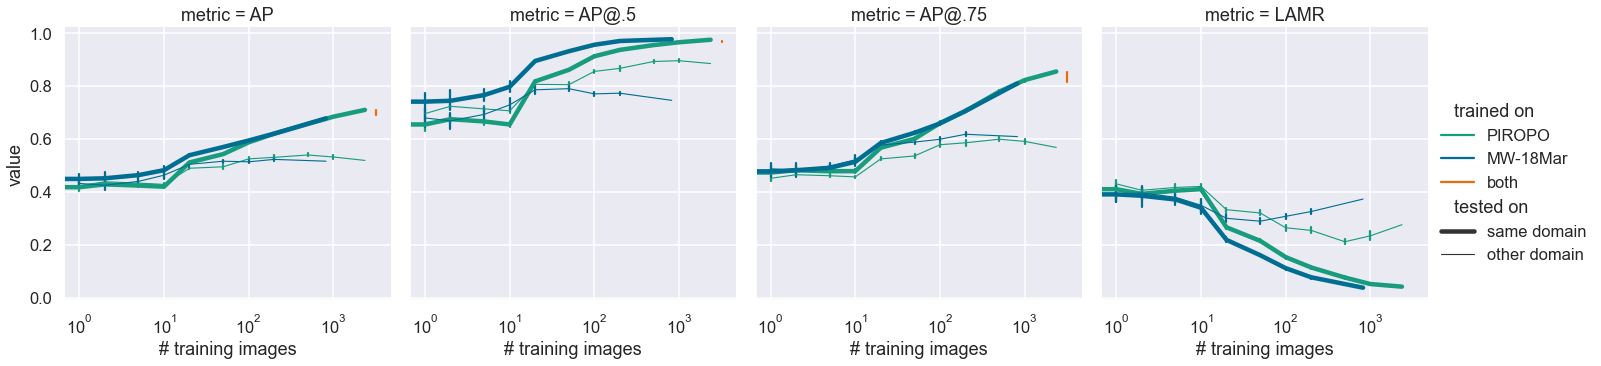

In [87]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='tested on', value='same domain')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='tested on', value='other domain')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='tested on', value='same domain')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='tested on', value='other domain')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='tested on', value='same domain')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='tested on', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

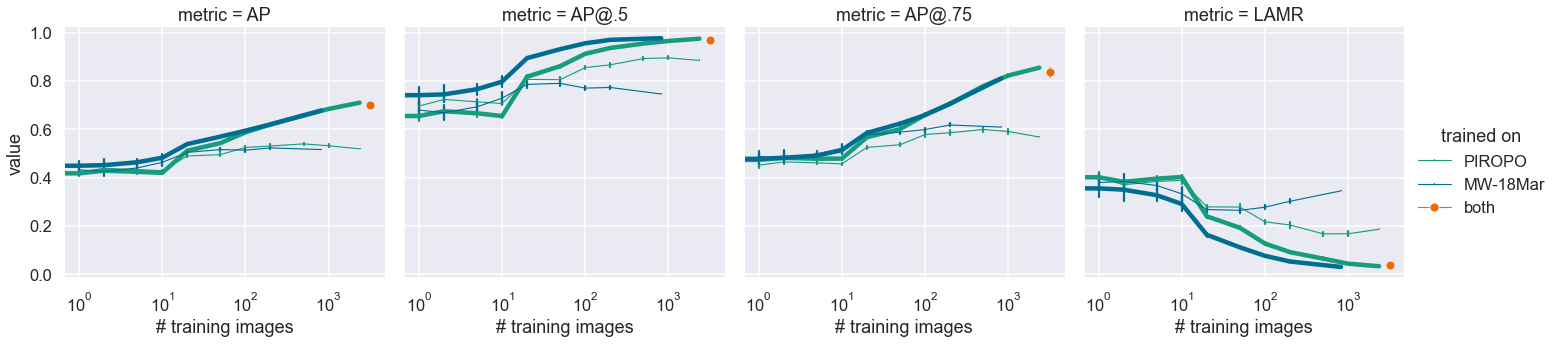

In [6]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='cross domain', value='no')
piropo.insert(loc=0, column='tested on', value='PIROPO')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='cross domain', value='yes')
piropo_mw.insert(loc=0, column='tested on', value='MW-18Mar')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='cross domain', value='no')
mw_18mar.insert(loc=0, column='tested on', value='MW-18Mar')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='cross domain', value='yes')
mw_piropo.insert(loc=0, column='tested on', value='PIROPO')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='cross domain', value='no')
piropomw.insert(loc=0, column='tested on', value='both')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.FacetGrid(df, col='metric', hue='trained on', hue_kws={'marker': [',',',','o']}, height=5)
g.map(sb.lineplot, '# training images', 'value', err_style='bars', size=df['cross domain'])
g.add_legend(adjust_subtitles=True)
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

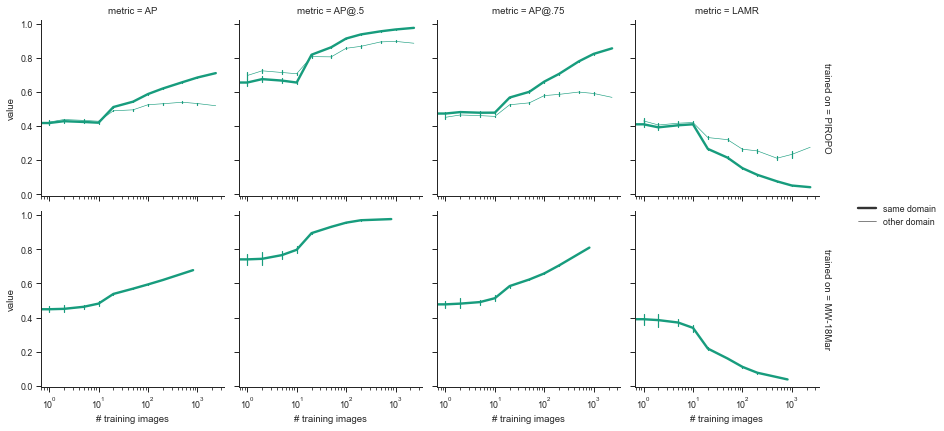

In [121]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 4.5))
# ax[0].set_title('AP')
# ax[1].set_title('AP@0.5')
# ax[2].set_title('LAMR')

# ax[0].plot()
piropo = eval_df(PIROPO)
piropo_mw = eval_df(PIROPO_MW)
mw_18mar = eval_df(MW_18MAR)
piropo.insert(loc=0, column='tested on', value='same domain')
piropo_mw.insert(loc=0, column='tested on', value='other domain')
mw_18mar.insert(loc=0, column='tested on', value='same domain')
piropo.insert(loc=0, column='trained on', value='PIROPO')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')
df = pd.concat([piropo, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

g = sb.FacetGrid(df, row='trained on', col='metric', margin_titles=True)
g.map(sb.lineplot, '# training images', 'value', err_style='bars', size=df['tested on'])
g.add_legend(adjust_subtitles=True)
# g.fig.subplots_adjust(hspace=.3)
plt.xscale('log')
# sb.lineplot(x='split', y='mAP', data=df)

g.savefig('piropo_mw.png')


   # training images id metric  value
0                  0  a     AP  0.383
1                  1  a     AP  0.414
2                  1  b     AP  0.421
3                  1  c     AP  0.393
4                  1  d     AP  0.424
   # training images id metric  value
0                  1  a     AP  0.413
1                  1  b     AP  0.418
2                  1  c     AP  0.405
3                  1  d     AP  0.433
4                  1  e     AP  0.439
   # training images id metric  value
0                  0  a     AP  0.400
1                  1  a     AP  0.497
2                  1  b     AP  0.474
3                  1  c     AP  0.420
4                  1  d     AP  0.400


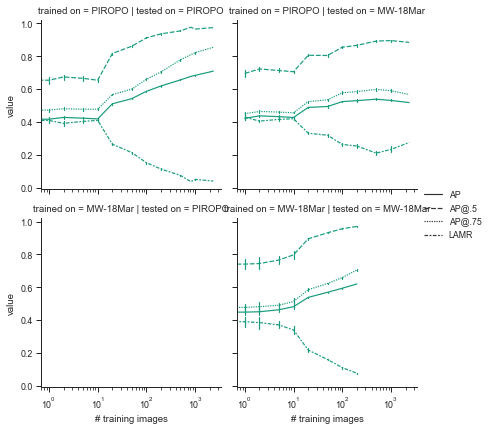

In [100]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 4.5))
# ax[0].set_title('AP')
# ax[1].set_title('AP@0.5')
# ax[2].set_title('LAMR')

# ax[0].plot()
piropo = eval_df(PIROPO)
piropo_mw = eval_df(PIROPO_MW)
mw_18mar = eval_df(MW_18MAR)
piropo.insert(loc=0, column='tested on', value='PIROPO')
piropo_mw.insert(loc=0, column='tested on', value='MW-18Mar')
mw_18mar.insert(loc=0, column='tested on', value='MW-18Mar')
piropo.insert(loc=0, column='trained on', value='PIROPO')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')
df = pd.concat([piropo, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

g = sb.FacetGrid(df, row='trained on', col='tested on')
g.map(sb.lineplot, '# training images', 'value', err_style='bars', style=df['metric'])
g.add_legend(adjust_subtitles=True)
# g.fig.subplots_adjust(hspace=.3)
plt.xscale('log')
# sb.lineplot(x='split', y='mAP', data=df)

g.savefig('piropo_mw.png')


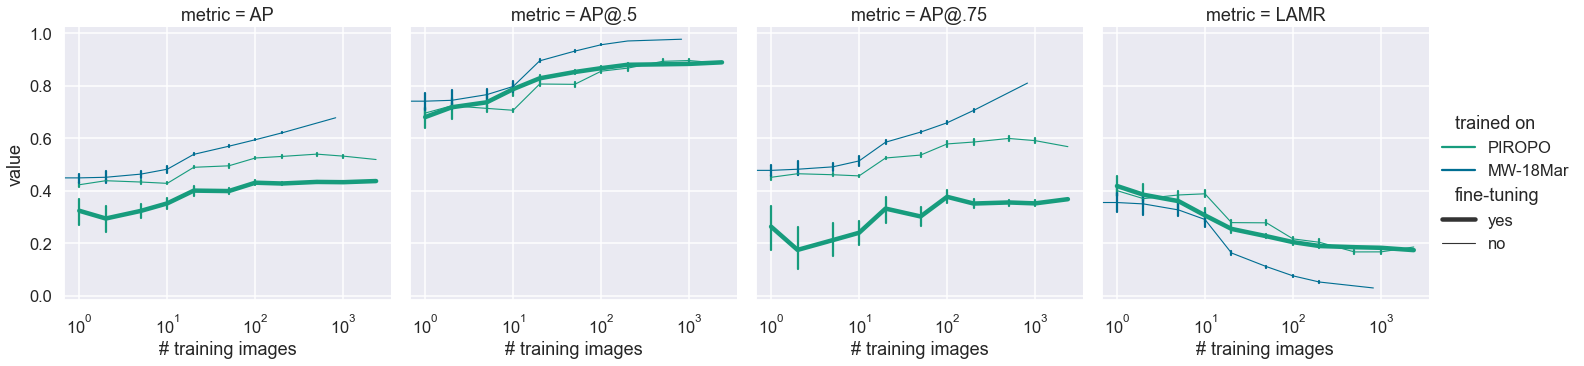

In [12]:
# piropo = eval_df(PIROPO)
# piropo.insert(loc=0, column='tested on', value='same domain')
# piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='fine-tuning', value='no')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

piropo_ft_mw = eval_df(PIROPO_FT_MW)
piropo_ft_mw.insert(loc=0, column='fine-tuning', value='yes')
piropo_ft_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='fine-tuning', value='no')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

# mw_piropo = eval_df(MW_PIROPO)
# mw_piropo.insert(loc=0, column='tested on', value='other domain')
# mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

# piropomw = eval_df(PIROPOMW)
# piropomw.insert(loc=0, column='tested on', value='same domain')
# piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo_ft_mw, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='fine-tuning', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')